<div dir="rtl">
    <h1>
        خوشه‌بندی کاربران در شبکه‌های اجتماعی
    </h1>
</div>

<div dir="rtl">
    هدف از این پروژه، جدا کردن و گروه‌بندی رئوس یک گراف همبند به صورت خوشه‌هایی است که بیشترین ارتباط را با هم دارند.
    برای مثال، ارتباط دوستی در یک شبکه‌ی اجتماعی را به صورت یال‌های بدون جهت بین کاربران در نظر بگیرید.
    می‌خواهیم کاربرانی که با هم بیشترین ارتباط را داشته و اجتماع‌های کوچک را تشکیل می‌دهند، پیدا کنیم.
    مثلا در گراف زیر، قرار است راس‌های ۱ تا ۴ در یک دسته و راس‌های ۵ تا ۹ در دسته‌ی دیگر قرار گیرند.
    </br>
    در این پروژه، ابتدا با دنبال کردن مراحل، قدم به قدم گراف زیر را خوشه‌بندی می‌کنید، سپس خودتان مراحل را روی گراف شامل ۳۵۱ فرد اجرا می‌کنید تا خوشه‌هایشان مشخص شود.
</div>

![Graph](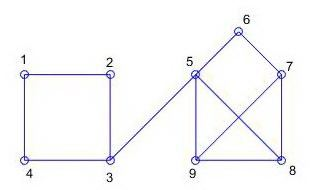
)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
adj = np.array([
        [0 , 1 , 0 , 1 , 0 , 0 , 0 , 0, 0],
        [1 , 0 , 1 , 0 , 0 , 0 , 0 , 0, 0],
        [0 , 0 , 0 , 1 , 0 , 1 , 0 , 0, 0],
        [1 , 0 , 1 , 0 , 0 , 0 , 0 , 0, 0],
        [0 , 0 , 1 , 0 , 0 , 1 , 0 , 1, 1],
        [0 , 0 , 0 , 0 , 1 , 0 , 1 , 0, 0],
        [0 , 0 , 0 , 0 , 0 , 1 , 0 , 1, 1],
        [0 , 0 , 0 , 0 , 1 , 0 , 1 , 0, 1],
        [0 , 0 , 0 , 0 , 1 , 0 , 1 , 1, 0],


    ])

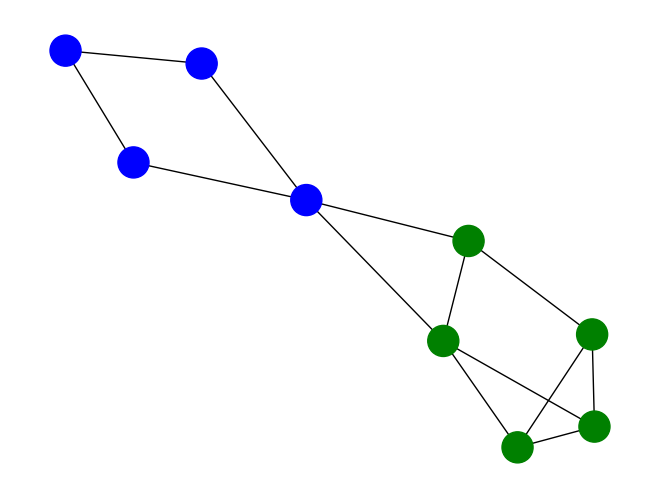

In [24]:
def show_graph(adjacency_matrix, labels=None):
    color_map = {0:'gray' ,1: 'blue', 2: 'green', 3: 'red', 4: 'yellow'}
    colors = [color_map[x] for x in labels] if labels is not None else None

    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, node_color=colors)
    plt.show()

#print(adj)
show_graph(adj, [1, 1, 1, 1, 2, 2, 2, 2, 2])

<div dir="rtl">
    می‌توانید از تابع show_graph برای نمایش گراف خود استفاده کنید.
    ورودی اول این تابع ماتریس مجاورت بوده و ورودی دوم آن در صورت داده شدن، باید به صورت یک لیست از اعداد ۱ تا ۴ باشد.
    بعد از خوشه‌بندی می‌توانید شماره‌ی خوشه‌ی متناظر با هر راس را در این لیست قرار دهید تا رنگ آن‌ها مشخص باشند.
</div>

<div dir="rtl">
    <h2>
        گراف تمرینی
    </h2>
</div>

<div dir="rtl">
    ابتدا ماتریس مجاورت گراف را به شکل یک ماتریس در numpy تعریف کنید.
    در این ماتریس، اگر بین دو راس i و j یال وجود داشته باشد،
    درایه‌ی i,j یک خواهد بود.
    بنابراین به دلیل بدون جهت بودن گراف، ماتریس متقارن خواهد بود.
</div>

In [6]:
#def adj matris
adj = np.array([
        [0 , 1 , 0 , 1 , 0 , 0 , 0 , 0, 0],
        [1 , 0 , 1 , 0 , 0 , 0 , 0 , 0, 0],
        [0 , 0 , 0 , 1 , 0 , 1 , 0 , 0, 0],
        [1 , 0 , 1 , 0 , 0 , 0 , 0 , 0, 0],
        [0 , 0 , 1 , 0 , 0 , 1 , 0 , 1, 1],
        [0 , 0 , 0 , 0 , 1 , 0 , 1 , 0, 0],
        [0 , 0 , 0 , 0 , 0 , 1 , 0 , 1, 1],
        [0 , 0 , 0 , 0 , 1 , 0 , 1 , 0, 1],
        [0 , 0 , 0 , 0 , 1 , 0 , 1 , 1, 0],


    ])

<div dir="rtl">
    در این مرحله، ابتدا جمع سطرها را محاسبه کرده و در بردار Sum ذخیره کنید.
    سپس ماتریس لاپلاسین را به صورت
    $
    Lapl = diag(Sum) - Adj
    $
    محاسبه کنید.
    منظور از
    $diag(x)$
    ماتریس قطری‌ای است که درایه‌های
    $x$
    روی قطر اصلی آن قرار گرفته و بقیه‌ی درایه‌های آن صفر هستند.
    هدف از محاسبه‌ی این ماتریس این است که با حفظ ویژگی‌های ماتریس مجاورت، جمع سطرها و ستون‌های آن نیز صفر شوند.
</div>

In [7]:
Sum = adj.sum(axis=1)
diag_sum = np.diag(Sum)
Lapl = diag_sum - adj
print(f'Sum:\n{Sum}')
print(f'diag:\n{diag_sum}')
print(f'lapl:\n{Lapl}')

Sum:
[2 2 2 2 4 2 3 3 3]
diag:
[[2 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 0]
 [0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 3]]
lapl:
[[ 2 -1  0 -1  0  0  0  0  0]
 [-1  2 -1  0  0  0  0  0  0]
 [ 0  0  2 -1  0 -1  0  0  0]
 [-1  0 -1  2  0  0  0  0  0]
 [ 0  0 -1  0  4 -1  0 -1 -1]
 [ 0  0  0  0 -1  2 -1  0  0]
 [ 0  0  0  0  0 -1  3 -1 -1]
 [ 0  0  0  0 -1  0 -1  3 -1]
 [ 0  0  0  0 -1  0 -1 -1  3]]


<div dir="rtl">
    حال باید مقدار ویژه و بردار ویژه‌های ماتریس را استخراج کنید.
    همچنین باید این مقادیر ویژه و بردار ویژه‌های متناظرشان، از کوچک به بزرگ مرتب شده باشند.
</div>

In [8]:
eigenvalues, eigenvectors = np.linalg.eig(Lapl)
#sort index
sorted_indices = np.argsort(eigenvalues)
#sorted_mat
eig_val = eigenvalues[sorted_indices]
eig_vec = eigenvectors[:, sorted_indices]
v1_1 = eig_vec[:,1]
#print(f'eig_val:\n{eig_val}')
#print(f'eig_vec:\n{eig_vec}')

<div dir="rtl">
    چون جمع سطرهای ماتریس لاپلاسین صفر بود، ماتریس تکین بوده و یک مقدار ویژه‌ی صفر خواهد داشت.
    همچنین ماتریس مثبت نیمه معین است و همه‌ی مقادیر ویژه نامنفی هستند.
    بنابراین کوچک‌ترین مقدار ویژه صفر بوده و مقدار ويژه‌ی بعدی مثبت خواهد بود.
    بردار ویژه‌ی متناظر با این مقدار ویژه را در نظر بگیرید.
    این بردار ویژه متناظر با کمترین واریانس است.
    (برای اطلاعات بیشتر در مورد PCA مطالعه کنید.)
    بنابراین مناسب‌ترین معیار برای خوشه‌بندی است.
    </br>
    راس‌هایی که درایه‌ی متناظرشان در این بردار ویژه مثبت است را در یک خوشه و راس‌هایی که منفی است را در خوشه‌ی دیگر در نظر بگیرید.
    با بررسی خروجی می‌توانید تبدیل شدن گراف اولیه به دو خوشه‌ی گفته شده در ابتدای پروژه را مشاهده کنید.
</div>

In [9]:
colors = [1 if  item >= 0 else 2  for item in  v1_1 ]

print(colors)

[2, 2, 2, 2, 1, 1, 1, 1, 1]


<div dir="rtl">
    گراف را با خوشه‌هایی که بدست آوردید توسط تابع show_graph نمایش دهید.
</div>

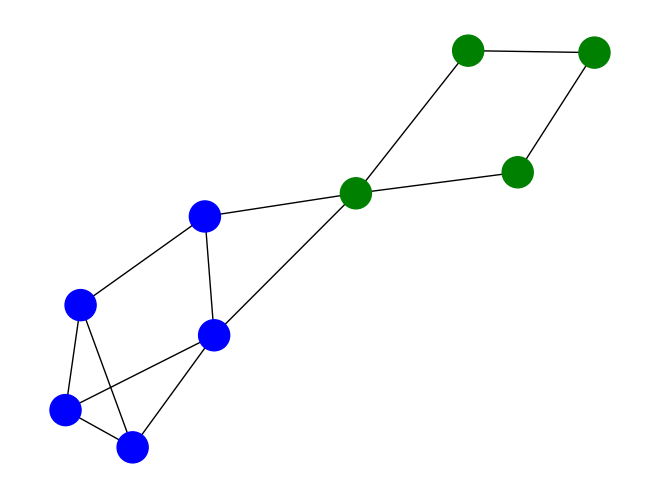

In [10]:
show_graph(adj , colors)

<div dir="rtl">
    برای داشتن تعداد بیشتری خوشه، می‌توان بردار ویژه‌های بیشتری در نظر گرفت.
    برای مثال، برای داشتن ۴ خوشه می‌توانید بردار ویژه‌ی متناظر با ۲ کوچک‌ترین مقدار ویژه‌های مثبت را در نظر بگیرید.
    حال به ازای هر راس، دو درایه در این دو بردار ویژه داریم.
    می‌توانید ۴ خوشه را به صورت زیر در نظر بگیرید:
    <ul>
        <li>$(+,+)$</li>
        <li>$(+,-)$</li>
        <li>$(-,+)$</li>
        <li>$(-,-)$</li>
    </ul>
    با انجام این خوشه‌بندی روی گراف اولیه، می‌توانید مشاهده کنید خوشه‌بندی مناسب نبوده و همان دو خوشه‌ی اولیه دقیق‌تر بودند.
</div>

In [11]:
#first eig vec
vec1 = eig_vec[: ,1]

#sec eig vec
vec2 = eig_vec[: ,2]

#clustered colors
clu_colors = [ 1 if( v1>=0 and v2>=0) else(2 if(v1>=0 and v2<=0) else(3 if (v1<0 and v2>=0) else 4  )) for v1,v2 in zip(vec2 , vec1)]

print(f'vec1 : {vec1} \nvec2 : {vec2}')
print(f'col_list : {clu_colors} ')


vec1 : [-0.59937226 -0.48914882 -0.19901826 -0.48914882  0.08091869  0.16431047
  0.18726948  0.16431047  0.16431047] 
vec2 : [-0.66374634 -0.03199793  0.66374634  0.03199793  0.22124878 -0.03199793
 -0.22124878 -0.09462542 -0.09462542]
col_list : [4, 4, 2, 2, 1, 3, 3, 3, 3] 


<div dir="rtl">
    گراف را با خوشه‌هایی که بدست آوردید توسط تابع show_graph نمایش دهید.
</div>

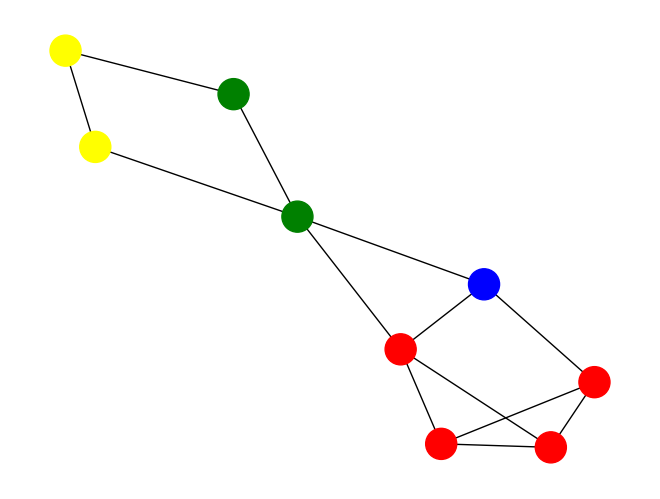

In [17]:
show_graph(adj , clu_colors)

<div dir="rtl">
    <h2>
        گراف اصلی
    </h2>
</div>

<div dir="rtl">
    اگر چه در گراف تمرینی خوشه‌بندی با چشم هم قابل مشاهده بود، در گراف با رئوس بیشتر این کار به صورت چشمی ممکن نیست.
    در این قسمت، مراحل بالا را روی گراف اصلی اجرا کنید و خوشه‌بندی با ۲ و ۴ خوشه را بدست آورید.

</div>

وقت به خیر و خسته نباشید . به چند شکل پیاده سازی کردم متاسفانه نتیجه ی چشمی درستی نگرفتم. به هر حال همه رو کامنت کردم. تشکر از زحمتتون.

In [19]:
adj_final = np.zeros((100, 100))
file1 = open('/content/data.txt', 'r')
lines = file1.readlines()
#print(lines[:5])
del lines[0]
print(len(lines))
for l in lines:
    i, j = l.split()
    adj_final[int(i) - 1, int(j) - 1] = 1
    adj_final[int(j) - 1, int(i) - 1] = 1
print(f'adj_fin: {adj_final}')

771
adj_fin: [[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [21]:
Sum_f = adj_final.sum(axis=1)
d = np.diag(Sum_f)  # degree
Lap_f = d - adj_final
#print(Lap_f[:3])

#eig vec and vals
eig_valf , eig_vecf  = np.linalg.eigh(Lap_f)
#print(len(eig_valf))
# eig vec's
vec_f1 , vec_f2 , vec_f3 , vec_f4 = eig_vecf[ : , 1] ,eig_vecf[ : , 2] ,eig_vecf[ : , 3] ,eig_vecf[ : , 4]
clusters_2 = [1 if v1 * v2 >= 0 else 2 for v1, v2 in zip(vec_f1, vec_f2)]
#clusters_3_4 = [1 if v3 * v4 >= 0 else 2 for v3, v4 in zip(vec_f3, vec_f4)]
#clusters_1_2_3_4 = [1 if first * second == 2 else 2 for first, second in zip(clusters_2, clusters_3_4)]
another_clus = []
'''
#not useful clustering
for v1,v2,v3,v4 in zip(vec_f1 , vec_f2 , vec_f3 , vec_f4):
  if( v1>=0  and v2<=0  and v3<=0  and v4<=0   ):
    another_clus.append(1 )

  elif( v1<=0  and v2>=0  and v3<=0  and v4<=0   ):
    another_clus.append(2 )

  elif( v1<=0  and v2<=0  and v3<=0  and v4>=0   ):
    another_clus.append( 3)

  else:
        another_clus.append(4 )
'''
eig_vecs = np.column_stack((vec_f1 , vec_f2 , vec_f3 ,vec_f4))
from sklearn.cluster import KMeans

kmeans_4 = KMeans(n_clusters=4, random_state=0, n_init=10)
clusters_by_km = kmeans_4.fit_predict(eig_vecs)


#print(clusters_2)
#print(clusters_3_4)
#print(clusters_1_2_3_4)
#print(another_clus)

<div dir="rtl">
    گراف‌هایی که با ۲ و ۴ خوشه، خوشه‌بندی کردید را توسط تابع show_graph نمایش دهید.
</div>

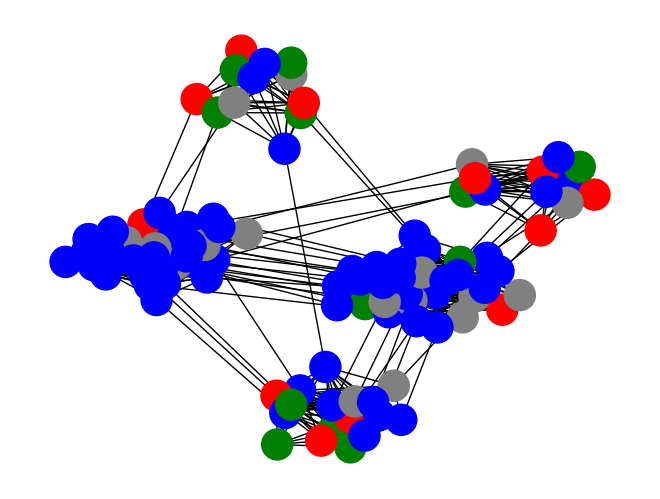

In [25]:
#show_graph(adj_final , clusters_2)
#show_graph(adj_final , another_clus)
show_graph(adj_final , clusters_by_km)